In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.app.flags.DEFINE_string('f', '', 'kernel')
import rnn_transformer
radar = rnn_transformer.Radar(mod='null', make_data=True)
def test_plot(inputs, labels, indexs):
    new_signal = []
    for x,y in zip([float(i) for i in inputs[indexs]], [float(i) for i in labels[indexs]]):
        new_signal.append(y-x)
    plt.plot(new_signal)

False
<class 'bool'>
Use median filter


W0214 17:10:17.588269 140342909249344 deprecation_wrapper.py:119] From /home/jwmun/ICASSP_paper/github/FMCWsimule/rnn_transformer.py:57: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0214 17:10:17.599900 140342909249344 deprecation_wrapper.py:119] From /home/jwmun/ICASSP_paper/github/FMCWsimule/rnn_transformer.py:75: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0214 17:10:17.600377 140342909249344 deprecation.py:323] From /home/jwmun/ICASSP_paper/github/FMCWsimule/rnn_transformer.py:76: GRUCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
W0214 17:10:17.601014 140342909249344 deprecation.py:323] From /home/jwmun/ICASSP_paper/github/FMCWsimule/rnn_transformer.py:78: bidirectional_dynamic_rnn (from tensorflow.python

This is test (150000, 416)
finished loading data!!
all data size is 150000
train size is (149000, 416)
valid size is (1000, 416)


W0214 17:10:19.248058 140342909249344 deprecation.py:323] From /home/jwmun/ICASSP_paper/github/FMCWsimule/rnn_transformer.py:119: dropout (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dropout instead.
W0214 17:10:19.273430 140342909249344 deprecation.py:323] From /home/jwmun/ICASSP_paper/github/FMCWsimule/rnn_transformer.py:122: average_pooling2d (from tensorflow.python.layers.pooling) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.AveragePooling2D instead.
W0214 17:10:19.360020 140342909249344 deprecation_wrapper.py:119] From /home/jwmun/ICASSP_paper/github/FMCWsimule/rnn_transformer.py:158: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W0214 17:10:22.433208 140342909249344 deprecation_wrapper.py:119] From /home/jwmun/ICASSP_paper/github/FMCWsimule/rnn_transformer.py:68: The name tf.train.Sa

In [2]:
#save_path = './distance_save/saved_model'
import time
import numpy as np
start_time = time.time()
save_path = '../../save_data/normal_noise_nomedian'
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with tf.Session(config=config) as sess:
    radar.saver.restore(sess, save_path)
    start_time = time.time()
    outputs = sess.run(radar.logits, feed_dict={radar.signal_input: radar.valid_inputs[:50], radar.rnn_keep_prob: 1, radar.dense_drop_rate: 0})
    end_time = time.time()
print(end_time-start_time)

W0214 17:10:27.106446 140342909249344 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


1.5611770153045654


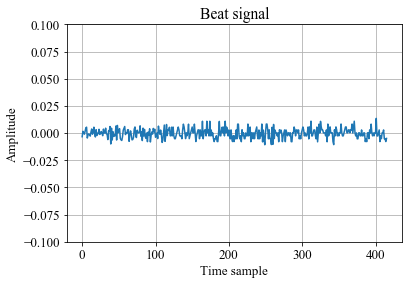

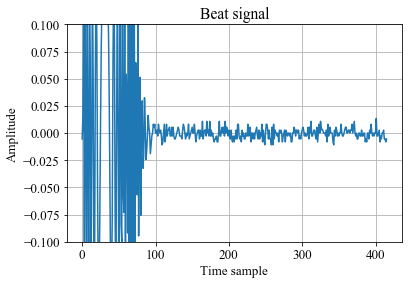

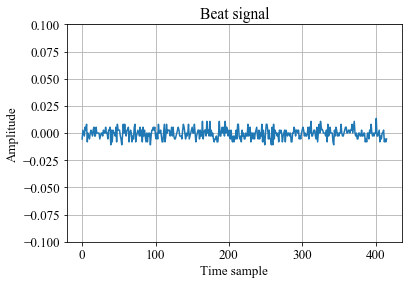

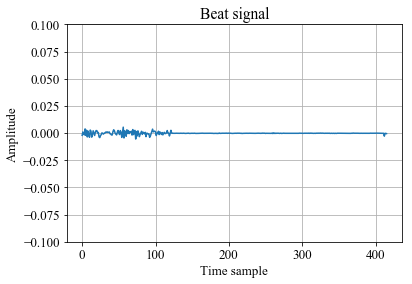

In [3]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.font_manager._rebuild()
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 13})
index2 = 6
plt.ylim
plt.figure(0)
plt.plot(outputs[index2])
plt.grid()
plt.title('Beat signal')
plt.xlabel('Time sample')
plt.ylabel('Amplitude')
plt.ylim([-0.1,0.1])
plt.savefig('output.png', dpi=350, bbox_inches='tight')

plt.figure(1)
plt.plot(radar.valid_inputs[index2])
plt.grid()
plt.title('Beat signal')
plt.xlabel('Time sample')
plt.ylabel('Amplitude')
plt.ylim([-0.1,0.1])
plt.savefig('input.png', dpi=350, bbox_inches='tight')

plt.figure(2)
plt.plot(radar.valid_labels[index2])
plt.grid()
plt.title('Beat signal')
plt.xlabel('Time sample')
plt.ylabel('Amplitude')
plt.ylim([-0.1,0.1])
plt.savefig('label.png', dpi=350, bbox_inches='tight')

plt.figure(3)
test_plot(outputs, radar.valid_labels, index2)
plt.grid()
plt.title('Beat signal')
plt.xlabel('Time sample')
plt.ylabel('Amplitude')
plt.ylim([-0.1,0.1])
plt.savefig('difference.png', dpi=350, bbox_inches='tight')